In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
df = pd.read_pickle("data/cleaned_dataset")

In [3]:
df

,permalink,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,investor_funding_total,Type,Major_Investor,new_status
0,/organization/waywire,#waywire,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,Pre-IPO,Seed,acquired
10,/organization/1000memories,1000memories,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2010-01-01,2011-02-16,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055000.0,Pre-IPO,Venture,acquired
13,/organization/100plus,100Plus,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0,Pre-IPO,Seed,acquired
15,/organization/10bestthings,10BestThings,Curated Web,50000.0,closed,USA,OH,Cleveland,Cleveland,1.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,Pre-IPO,Seed,closed
30,/organization/170-systems,170 Systems,Software,14000000.0,acquired,USA,MA,Boston,Bedford,1.0,2002-04-16,2002-04-16,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000000.0,Pre-IPO,Venture,acquired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26494,/organization/zume-life,Zume Life,iPhone,1700000.0,closed,USA,CA,SF Bay Area,San Jose,2.0,2007-01-01,2008-04-01,700000.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700000.0,Pre-IPO,Venture,closed
26507,/organization/zuujit,Zuujit,E-Commerce,2700000.0,closed,USA,CA,Santa Barbara,Santa Barbara,1.0,2010-04-30,2010-04-30,0.0,0.0,0.0,0.0,0.0,0.0,2700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700000.0,Pre-IPO,Angel,closed
26509,/organization/zvents,Zvents,Entertainment,55200000.0,acquired,USA,CA,SF Bay Area,San Mateo,4.0,2005-10-05,2011-09-30,200000.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0,110200000.0,Pre-IPO,Venture,acquired
26514,/organization/zykis,Zykis,Automotive,800000.0,closed,USA,CA,Anaheim,Irvine,1.0,2006-10-27,2006-10-27,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,Pre-IPO,Angel,closed


# Distribution of Funding Option

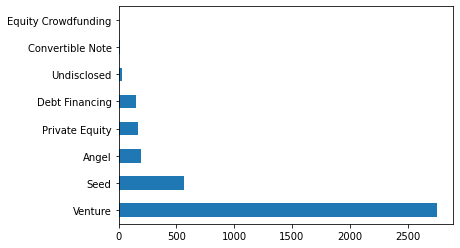

In [4]:
df['Major_Investor'].value_counts().plot(kind='barh')

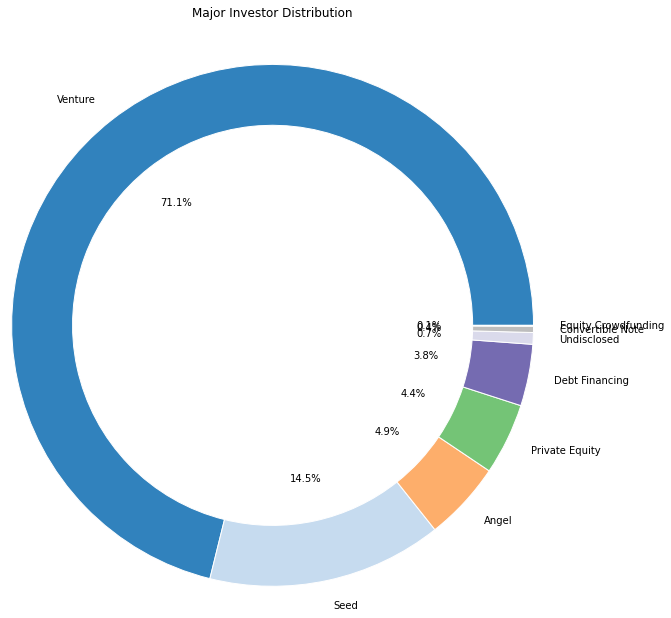

In [5]:
status=df.Major_Investor.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(8)*3)
plt.pie(status.values, radius=3, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.7, edgecolor='w'))
plt.title('Major Investor Distribution',pad=200)
plt.show()

# Distribution of company stage types 

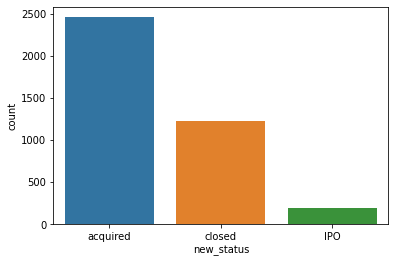

In [6]:
sns.countplot('new_status',data=df)

- The Majority of our companies have been acquired and just a few part of our dataset are IPO's let's now look at the distribution per status in more degtail

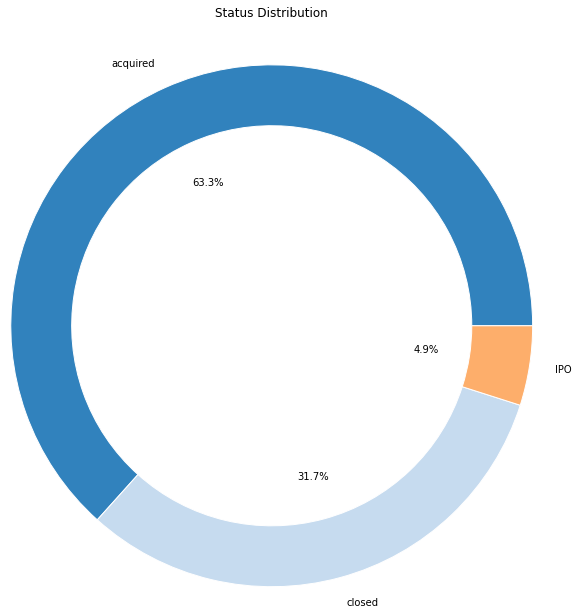

In [7]:
status=df.new_status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(8)*3)
plt.pie(status.values, radius=3, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.7, edgecolor='w'))
plt.title('Status Distribution',pad=200)
plt.show()

- As we can see we have 4.9% of our companies that are our "Successful" / IPO
- 63% that we can classify as "Successful Acquisition" / Acquired
- 31.7% that we can classify as "Failed" / Closed

# Distribution of total funding with respect to their major funding option

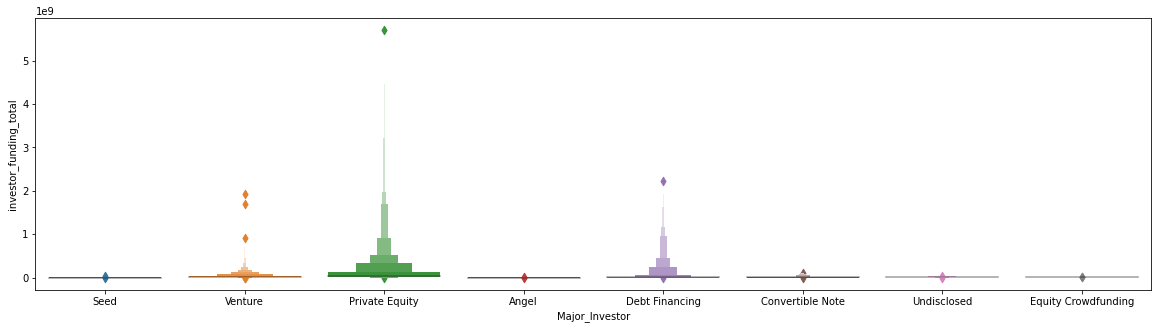

In [8]:
plt.figure(figsize=(20,5))
df.groupby('new_status').sum()
sns.boxenplot(x='Major_Investor', y='investor_funding_total', data=df);

- We can observe that most of the total funding comes from Private Equity, then Venture Capital and thirdly Debt Financing

# How does the amount raised correlate with success?

***removing companies of our average that have just done 1 fund-raising as well as the ones for which first_funding_at is the same as last_funding_at as it wont allow us to calculate the time between the rounds***

In [9]:
df_for_avg = df[df["funding_rounds"] > 1]
df_for_avg = df[df["first_funding_at"] != df['last_funding_at']]
df_for_avg

,permalink,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,investor_funding_total,Type,Major_Investor,new_status
10,/organization/1000memories,1000memories,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2010-01-01,2011-02-16,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055000.0,Pre-IPO,Venture,acquired
13,/organization/100plus,100Plus,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0,Pre-IPO,Seed,acquired
50,/organization/24-7-card,24/7 Card,Finance,3452941.0,closed,USA,CA,Los Angeles,Los Angeles,3.0,2010-10-25,2011-12-21,0.0,3452941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3452941.0,Pre-IPO,Venture,closed
82,/organization/3clickemr-corporation,3ClickEMR Corporation,Electronic Health Records,500000.0,closed,USA,MA,Boston,West Roxbury,2.0,2010-06-23,2011-06-01,250000.0,0.0,0.0,0.0,0.0,0.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,Pre-IPO,Angel,closed
86,/organization/3d-future-vision-ii,3D FUTURE VISION II,Games,503000.0,closed,USA,FL,Orlando,Longwood,2.0,2011-06-22,2013-03-21,0.0,503000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503000.0,Pre-IPO,Venture,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26475,/organization/zs-pharma,ZS Pharma,Biotechnology,122987972.0,operating,USA,TX,Dallas,Coppell,5.0,2010-12-14,2014-07-18,0.0,102987972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000.0,0.0,0.0,0.0,0.0,46000000.0,55000000.0,0.0,0.0,0.0,0.0,223987972.0,IPO,Venture,IPO
26477,/organization/ztail,Ztail,Price Comparison,1500000.0,closed,USA,CA,SF Bay Area,Palo Alto,2.0,2008-05-01,2009-04-01,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Pre-IPO,Angel,closed
26494,/organization/zume-life,Zume Life,iPhone,1700000.0,closed,USA,CA,SF Bay Area,San Jose,2.0,2007-01-01,2008-04-01,700000.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700000.0,Pre-IPO,Venture,closed
26509,/organization/zvents,Zvents,Entertainment,55200000.0,acquired,USA,CA,SF Bay Area,San Mateo,4.0,2005-10-05,2011-09-30,200000.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0,110200000.0,Pre-IPO,Venture,acquired


In [10]:
df_for_avg.groupby("new_status").agg({"funding_total_usd": "mean"}) / 1000000

,funding_total_usd
new_status,
IPO,116.511699
acquired,33.689994
closed,23.311573


In [11]:
df_for_avg['Major_Investor'].value_counts()

Venture                1685
Seed                    148
Angel                    72
Debt Financing           72
Private Equity           62
Undisclosed              22
Convertible Note          9
Equity Crowdfunding       1
Name: Major_Investor, dtype: int64

- We can observe that companies get acquired at around 33m of investment
- Companies closes on average after 23m on fund raised
- IPO raise on average in this dataset 150m
- Another thing interesting to investigate would be the correlation between beeing a private equity funded company and IPO ( success ) 

(note however that we classified as "Private Equity" companies that received equally fund from "Venture Capital" as "Private Equity" as the last one having more impact on the management of the company that we are not measuring in this analysis)

In [12]:
df_for_avg.groupby("new_status").agg({"funding_rounds": "mean"})

,funding_rounds
new_status,
IPO,4.400000
acquired,3.090054
closed,2.807947


- We have in average 4 funding rounds for IPO
- 3 rounds for acquired companies
- 3 round for closed companies

In [13]:
df_for_avg.groupby("Major_Investor").agg({"funding_rounds": "mean"})

,funding_rounds
Major_Investor,
Angel,2.597222
Convertible Note,3.333333
Debt Financing,3.152778
Equity Crowdfunding,2.000000
Private Equity,3.338710
Seed,2.310811
Undisclosed,2.909091
Venture,3.194659


In [14]:
df_for_avg.groupby(["new_status","Major_Investor"]).agg({"investor_funding_total": "mean"})

investor_funding_total
new_status Major_Investor                             
IPO        Convertible Note               1.160000e+08
           Debt Financing                 1.457867e+08
           Private Equity                 1.202501e+08
           Seed                           1.769008e+07
           Venture                        1.569678e+08
acquired   Angel                          1.870093e+06
           Convertible Note               1.437143e+06
           Debt Financing                 6.863374e+07
           Equity Crowdfunding            6.322000e+06
           Private Equity                 3.937062e+08
           Seed                           1.520890e+06
           Undisclosed                    1.355754e+07
           Venture                        5.043518e+07
closed     Angel                          1.552670e+06
           Convertible Note               4.126200e+06
           Debt Financing                 1.107139e+08
           Private Equity                 5.644244e+07
           Seed                           1.064011e+06
           Venture                        3.836585e+07

In [15]:
df_for_avg.groupby(["new_status","Major_Investor"]).agg({"new_status": "count"})

new_status
new_status Major_Investor                 
IPO        Convertible Note              1
           Debt Financing                9
           Private Equity               27
           Seed                          2
           Venture                      91
acquired   Angel                        31
           Convertible Note              7
           Debt Financing               38
           Equity Crowdfunding           1
           Private Equity               29
           Seed                         99
           Undisclosed                  22
           Venture                    1261
closed     Angel                        41
           Convertible Note              1
           Debt Financing               25
           Private Equity                6
           Seed                         47
           Venture                     333

How many days do companies operate until exit.
Don't have that information, but maybe we can look at days between first and last funding

In [16]:
df_for_avg = df_for_avg.assign(month_between_funding=(df_for_avg["last_funding_at"] - df_for_avg["first_funding_at"]).dt.days/30) 

In [17]:
df_for_avg.groupby("new_status").agg({"month_between_funding": "mean"})

,month_between_funding
new_status,
IPO,49.190000
acquired,34.032930
closed,24.995953


- We have on average 49 months between the first and the last round of funding for IPO
- 34 months between between the first and the last round of funding for acquired
- 25 months between the first and the last round of funding for closed

In [18]:
df_for_avg["month_between_funding"].value_counts()

12.166667     12
12.200000      7
24.366667      6
13.200000      6
21.300000      6
              ..
115.100000     1
40.300000      1
69.100000      1
576.233333     1
80.500000      1
Name: month_between_funding, Length: 1287, dtype: int64

In [19]:
df_for_avg

,permalink,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,investor_funding_total,Type,Major_Investor,new_status,month_between_funding
10,/organization/1000memories,1000memories,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2010-01-01,2011-02-16,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055000.0,Pre-IPO,Venture,acquired,13.700000
13,/organization/100plus,100Plus,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0,Pre-IPO,Seed,acquired,0.933333
50,/organization/24-7-card,24/7 Card,Finance,3452941.0,closed,USA,CA,Los Angeles,Los Angeles,3.0,2010-10-25,2011-12-21,0.0,3452941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3452941.0,Pre-IPO,Venture,closed,14.066667
82,/organization/3clickemr-corporation,3ClickEMR Corporation,Electronic Health Records,500000.0,closed,USA,MA,Boston,West Roxbury,2.0,2010-06-23,2011-06-01,250000.0,0.0,0.0,0.0,0.0,0.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,Pre-IPO,Angel,closed,11.433333
86,/organization/3d-future-vision-ii,3D FUTURE VISION II,Games,503000.0,closed,USA,FL,Orlando,Longwood,2.0,2011-06-22,2013-03-21,0.0,503000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,503000.0,Pre-IPO,Venture,closed,21.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26475,/organization/zs-pharma,ZS Pharma,Biotechnology,122987972.0,operating,USA,TX,Dallas,Coppell,5.0,2010-12-14,2014-07-18,0.0,102987972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000000.0,0.0,0.0,0.0,0.0,46000000.0,55000000.0,0.0,0.0,0.0,0.0,223987972.0,IPO,Venture,IPO,43.733333
26477,/organization/ztail,Ztail,Price Comparison,1500000.0,closed,USA,CA,SF Bay Area,Palo Alto,2.0,2008-05-01,2009-04-01,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,Pre-IPO,Angel,closed,11.166667
26494,/organization/zume-life,Zume Life,iPhone,1700000.0,closed,USA,CA,SF Bay Area,San Jose,2.0,2007-01-01,2008-04-01,700000.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2700000.0,Pre-IPO,Venture,closed,15.200000
26509,/organization/zvents,Zvents,Entertainment,55200000.0,acquired,USA,CA,SF Bay Area,San Mateo,4.0,2005-10-05,2011-09-30,200000.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,24000000.0,24000000.0,0.0,0.0,0.0,0.0,0.0,110200000.0,Pre-IPO,Venture,acquired,72.866667


In [20]:
df_for_avg.dtypes

permalink                         object
name                              object
market                            object
funding_total_usd                float64
status                            object
country_code                      object
state_code                        object
region                            object
city                              object
funding_rounds                   float64
first_funding_at          datetime64[ns]
last_funding_at           datetime64[ns]
seed                             float64
venture                          float64
equity_crowdfunding              float64
undisclosed                      float64
convertible_note                 float64
debt_financing                   float64
angel                            float64
grant                            float64
private_equity                   float64
post_ipo_equity                  float64
post_ipo_debt                    float64
secondary_market                 float64
product_crowdfun

In [21]:
df_for_avg.columns

Index(['permalink', 'name', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'investor_funding_total', 'Type', 'Major_Investor',
       'new_status', 'month_between_funding'],
      dtype='object')

In [22]:
df = df.assign(month_between_funding=(df["last_funding_at"] - df["first_funding_at"]).dt.days/30) 

### 1. Facts:
- Companies that closed, acquired a lot less money throughout their operations
- An IPO has 30 months between the first and the last round of funding on average and raises on average 3 rounds
- Companies that get acquired see this number reduced to 20 months between funding and raises on average 2 rounds
- There is on average 10 months between the first and the last round

- (correct the average to exclude the ones that have only 1 round) !

### 2. Interpretations / Discussion:

- The second round of investment is the most interesting stage to an investor
- Companies that raises more rounds after the 2nd rounds without being acquired have more chances to go public
- Companies that fail to get additional funding are more likely to close
- _Private equity seems to be a financing option for potentially successful startups._

### 3. Features:
- funding_rounds
- seed
- venture
- equity_crowdfunding
- undisclosed
- convertible_note
- debt_financing
- angel
- grant
- private_equity
- post_ipo_equity'
- post_ipo_debt'
- secondary_market
- product_crowdfunding
- investor_funding_total
- month_between_funding

In [23]:
final_df = df[['name',
               'funding_rounds',
               'seed',
               'venture',
               'equity_crowdfunding',
               'undisclosed',
               'convertible_note',
               'debt_financing',
               'angel',
               'grant',
               'private_equity',
               'post_ipo_equity',
               'post_ipo_debt',
               'secondary_market',
               'product_crowdfunding',
               'investor_funding_total',
               'month_between_funding',
               'new_status']].reset_index(drop=True)

In [24]:
final_df.to_pickle("data/final_dataset.pkl")

Next steps:

- Finish the summary
- Add distribution of financing options per status (what we started). Finish and interpret it
- select the features
- export dataset with relevant features


## Machine Learning (new notebook)

- Preprocess all the features
    - Create dummy variables for all categorical features
    - every feature has to be numerical
    - maybe rescaling numerical features (i.e. standard scaler, min-max sclaer, log transform)
- Create response variable (success) (has to be 0|1)
    - closed = 0, IPO|acquired = 1
- balance your dataset: same number of success = 1 as success = 0
- split dataset to train and test
- using train set:
    - run feature selection (i.e. RFE)
    - choose ML model (i.e. LogisticRegression or RandomForest)
    - Test on test set to establish a baseline
    - Re-iterate using hyperparameter tuning to tune your model
- Pick the best performing model (incl. hyperparameters)